# Waze app: user churn analysis and prediction model
Part 2: data visualization

In [1]:
# import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset into a dataframe
df = pd.read_csv("waze_dataset.csv")

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# generate summary statistics
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In order to better understand and explain the data, the following data visualization types will be used:  

*   **Box plots** to determine outliers and understand where the bulk of the data points reside in terms of continuous numerical variables (e.g. *drives* and *sessions*)
*   **Histograms** to understand the distribution of variables
*   **Scatter plots** to visualize relationships between variables
*   **Bar charts** to visualize levels and quantities, especially for categorical variables

We start by visualizing the spread and distribution of the *sessions* and *drives* variables using box plots and histograms.









**sessions**: *the number of occurrences of a user opening the app during the month*

Text(0.5, 1.0, 'Monthly sessions per user')

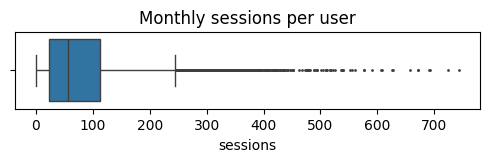

In [6]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["sessions"], fliersize=1) # fliersize indicates the size of the markers for outlier observations
plt.title("Monthly sessions per user")

Text(0.5, 1.0, 'Monthly sessions per user')

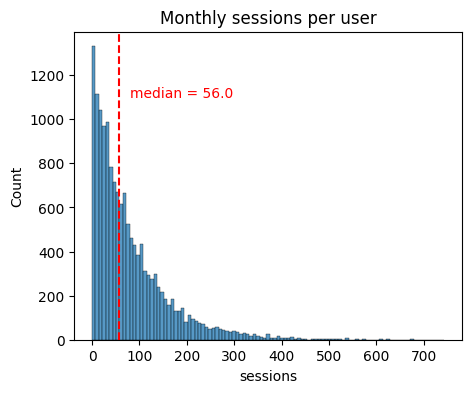

In [7]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["sessions"])
median = df["sessions"].median()
plt.axvline(median, color="red", linestyle="--")
plt.text(80,1100, "median = 56.0", color="red")
plt.title("Monthly sessions per user")

As displayed above, the sessions variable is right-skewed. Half of the observations represent 56 or
fewer user sessions per month.

**drives**: *an occurrence of driving at least 1 km during the month*

Text(0.5, 1.0, 'Drives (of at least 1km) per month')

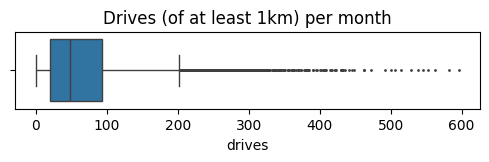

In [8]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["drives"], fliersize=1)
plt.title("Drives (of at least 1km) per month")

To simplify the process of plotting the same type of histograms for several variables, the following function has been used:

In [9]:
def histogrammer(column_name, median_text=True, **kwargs):
  # **kwargs allow you to pass multiple keyword arguments to the function
  median=round(df[column_name].median(), 1)
  plt.figure(figsize=(5,3))
  ax = sns.histplot(x=df[column_name], **kwargs)
  plt.axvline(median, color="red", linestyle="--") # plot median line
  if median_text==True:  # add median text
    ax.text(0.20, 0.85, f'median={median}', color="red", ha="left", va="top", transform=ax.transAxes)
  else:
    print("Median:", median)
  plt.title(f'{column_name} histogram')

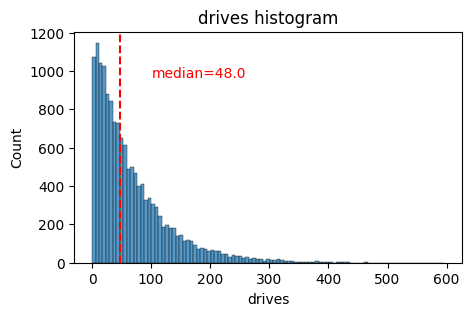

In [10]:
histogrammer("drives")

Similarly to the *sessions* distribution, the *drives* distribution is also right-skewed and has a median of 48 drives (of at least 1km) per user during the last month.

**total_sessions**: *estimate of the total number of sessions since a user has onboarded*

Text(0.5, 1.0, 'total_sessions')

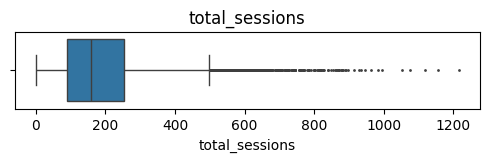

In [11]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["total_sessions"], fliersize=1)
plt.title("total_sessions")

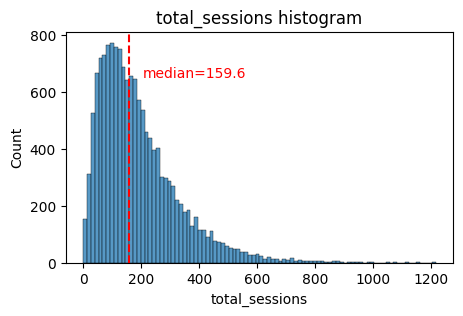

In [12]:
histogrammer("total_sessions")

The *total sessions* distribution is also right-skewed, with a median of 159.6.  

**n_days_after_onboarding**: *number of days since a user signed up for the Waze app*

Text(0.5, 1.0, 'n_days_after_onboarding')

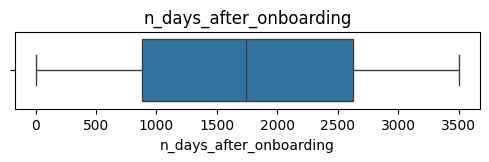

In [13]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["n_days_after_onboarding"], fliersize=1)
plt.title("n_days_after_onboarding")

Median: 1741.0


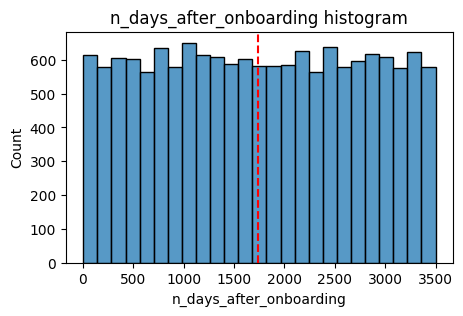

In [14]:
histogrammer("n_days_after_onboarding", median_text=False)

The "n_days_after_onboarding" variable shows a uniform distribution.

**driven_km_drives**: *total kilometers driven during the month*

Text(0.5, 1.0, 'driven_km_drives')

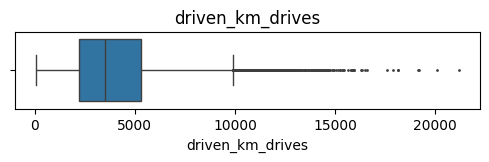

In [15]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["driven_km_drives"], fliersize=1)
plt.title("driven_km_drives")

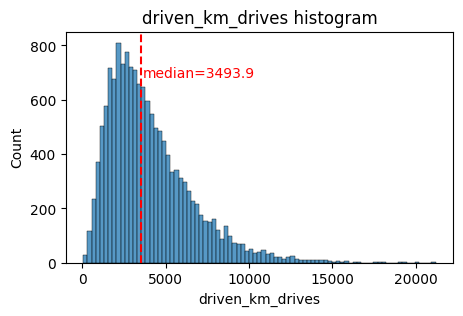

In [16]:
histogrammer("driven_km_drives")

The graphs show another right-skewed distribution, with a median of 3,495 kilometers driven per user in the last month.

**duration_minutes_drives**: *total minutes driven during last month*

Text(0.5, 1.0, 'duration_minutes_drives')

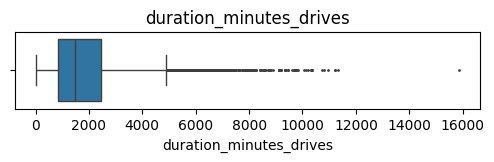

In [17]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["duration_minutes_drives"], fliersize=1)
plt.title("duration_minutes_drives")

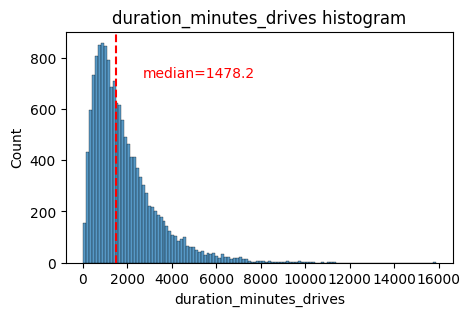

In [18]:
histogrammer("duration_minutes_drives")

The *duration_minutes_drives* variable has a median of 1478 minutes, indicating that half of the users drove less than 25 hours in the last month.

**activity_days**: *number of days the user opened the app during the month*

Text(0.5, 1.0, 'activity_days')

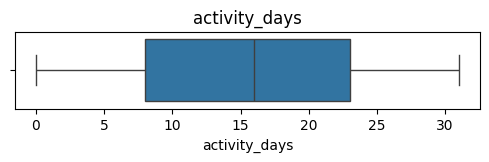

In [19]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["activity_days"], fliersize=1)
plt.title("activity_days")

Median: 16.0


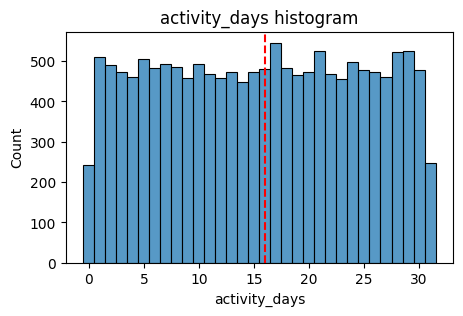

In [20]:
histogrammer("activity_days", median_text=False, discrete=True)

The *activity_days* variable shows a centered distribution, with ~250 users who never opened the app during the month and ~250 users who opened the app every day.

**driving_days**: *number of days the user drives (at least 1 km) during the month*

Text(0.5, 1.0, 'driving_days')

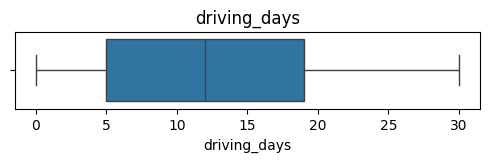

In [21]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df["driving_days"], fliersize=1)
plt.title("driving_days")

Median: 12.0


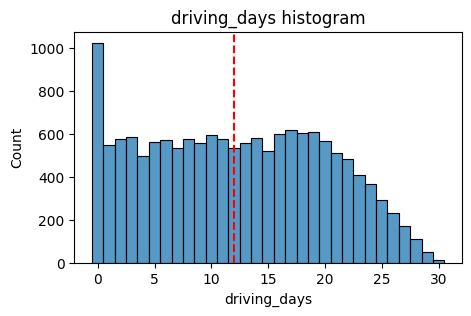

In [22]:
histogrammer("driving_days", median_text=False, discrete=True)

The *driving_days* variable shows a quite uniform distribuion, tailing off on the right. However, it also shows that ~1,000 users did not drive at all during the whole month.

**device**: *type of device a user starts a session with*

Since this is a categorical variable, a pie chart will be used:

In [23]:
data = df["device"].value_counts()
data

iPhone     9672
Android    5327
Name: device, dtype: int64

Text(0.5, 1.0, 'Users by device')

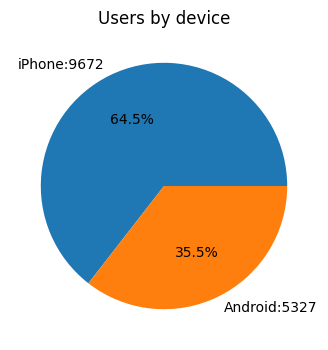

In [24]:
fig = plt.figure(figsize=(4,4))
plt.pie(data,
        # format the labels as "device : value_counts"
        labels=[f'{data.index[0]}:{data.values[0]}',
        f'{data.index[1]}:{data.values[1]}'],
        # add the percentage:
        autopct='%1.1f%%'
        )

plt.title("Users by device")

**label**: *binary target variable (“retained” vs “churned”) for if a user has churned anytime during
the course of the month*

In [25]:
data = df["label"].value_counts()
data

retained    11763
churned      2536
Name: label, dtype: int64

Text(0.5, 1.0, 'Count of retained vs churned users')

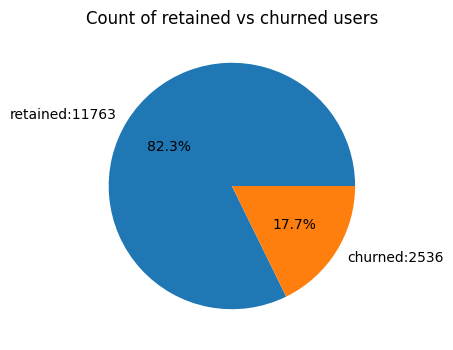

In [26]:
fig = plt.figure(figsize=(4,4))
plt.pie(data,
        # format the labels as "label : value_counts"
        labels=[f'{data.index[0]}:{data.values[0]}',
        f'{data.index[1]}:{data.values[1]}'],
        # add the percentage:
        autopct='%1.1f%%'
        )

plt.title("Count of retained vs churned users")


Next, we are going to plot a histogram that compares the *driving_days* variable with the *activity_days* one. Since these two variables both represent counts of days over a month, the histogram will help us compare the two variables for each day of the month.

Text(0.5, 1.0, 'Driving days vs activity days')

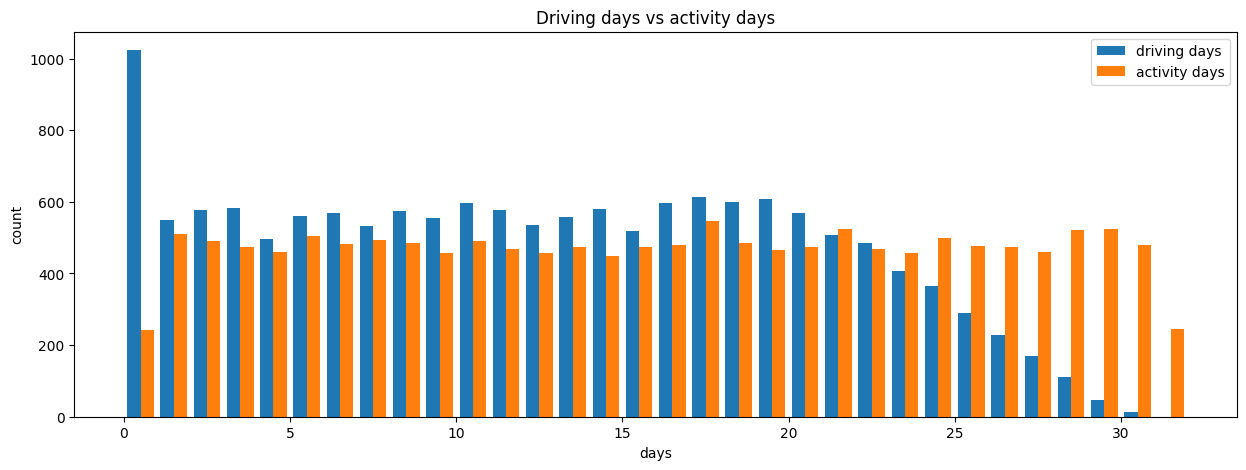

In [27]:
plt.figure(figsize=(15,5))
label=["driving days", "activity days"]

plt.hist([df["driving_days"], df["activity_days"]],
         bins=range(0,33),
         label=label)

plt.xlabel("days")
plt.ylabel("count")
plt.legend()
plt.title("Driving days vs activity days")

The graph highlights that the number of users who did not drive at all during the month is much higher than the number of users who did not open the app at all.

In [28]:
print(df["driving_days"].max())
print(df["activity_days"].max())

30
31


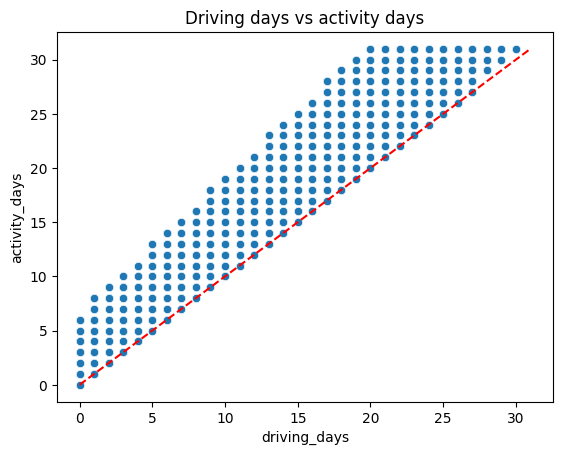

In [29]:
sns.scatterplot(data=df, x="driving_days", y="activity_days")
plt.title("Driving days vs activity days")
plt.plot([0,31], [0,31], color="red", linestyle="--")

Next, we are going to plot another histogram to represent the **retention rate** for each device.

Text(0.5, 1.0, 'Retention by device')

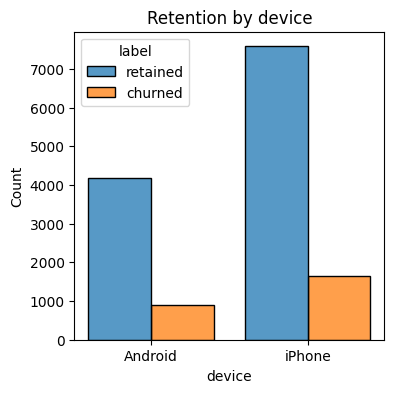

In [30]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x="device", hue="label", multiple="dodge", shrink=0.8)
# "dodge" is used to show the categories side by side

plt.title("Retention by device")

The proportion of churned users to retained users is consistent between device types.

Next, we try to examine the **retention by kilometers driven per driving day**.

We had previously found that the median distance driven per driving day last month for users who churned was 608.78 km versus 247.48 km for users who did not churn.

In [31]:
# create new column
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]
# mean distance driven per driving day for each user

df["km_per_driving_day"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The function returns:

*   mean: infinity
*   standard deviation: NaN
*   max: infinity

This is the result of there being values of zero in the *driving_days* column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

In [32]:
# convert infinity values to zero
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0

df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

Text(0.5, 1.0, 'Churn rate by mean km per driving day')

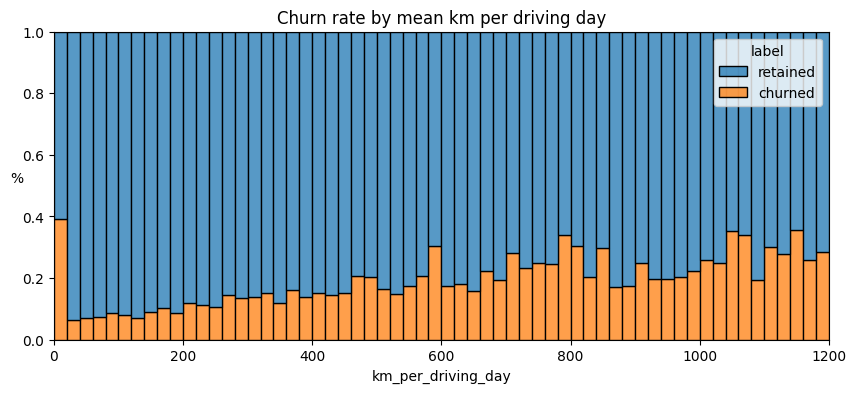

In [33]:
plt.figure(figsize=(10,4))

sns.histplot(data=df,
             x="km_per_driving_day",
             bins=range(0,1201,20),
             # only plot values up to 1200km per day
             hue="label",
             multiple="fill")

plt.ylabel("%", rotation=0)
plt.title("Churn rate by mean km per driving day")


As the daily driven distance increases, the churn rate also increases, meaning that users driving longer distances tend to discontinue using the app.

Text(0.5, 1.0, 'Churn rate per driving day')

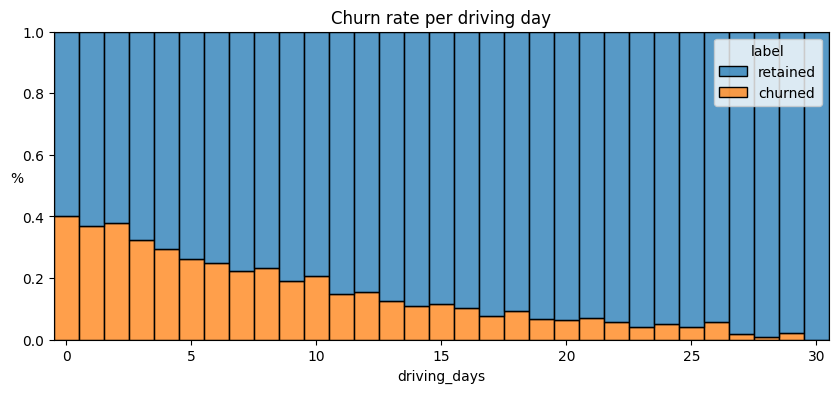

In [34]:
plt.figure(figsize=(10,4))
sns.histplot(data=df,
             x="driving_days",
             bins=range(1,32),
             hue="label",
             multiple="fill",
             discrete=True)

plt.ylabel("%", rotation=0)
plt.title("Churn rate per driving day")

As expected, we see a higher churn rate for those users who used the app less during the month, while the users who used the app most days had lower churn rates.

In [35]:
# new columng with % of each user's total sessions of last month
df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]

# recall that "sessions" is related only to the last month, while "total sessions" counts the sessions since onboarding

In [36]:
df["percent_sessions_in_last_month"].median()

0.42309702992763176

Half of the people in the dataset had 40% or more of their sessions in just the last month.

Median: 0.4


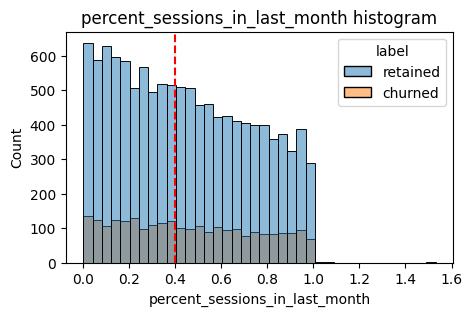

In [37]:
histogrammer("percent_sessions_in_last_month",
             hue=df["label"],
             multiple="layer",
             median_text=False)

In [38]:
df["n_days_after_onboarding"].median()

1741.0

Text(0.5, 1.0, 'Num. days after onboarding for users with >=40% sessions in last month')

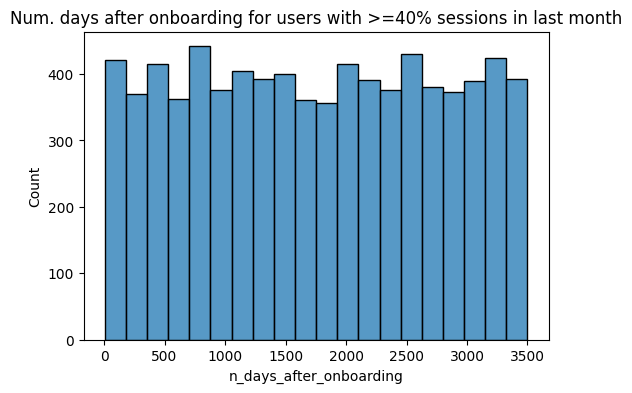

In [39]:
data=df.loc[df["percent_sessions_in_last_month"]>=0.4]

plt.figure(figsize=(6,4))
sns.histplot(x=data["n_days_after_onboarding"])
plt.title("Num. days after onboarding for users with >=40% sessions in last month")

We found that half of the people in the dataset had 40% or more of their sessions in just the last month, however the overall median time since onboarding the app is of almost 5 years.

Many long-time users suddenly used the app more in the last month. This will have to be further examined.

### Handling outliers

As we saw from the previously made  box plots, many variables have right-skewed distributions and therefore outliers.
We can try to impute outlying data with more reasonable values by setting a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile. such as the 95th percentile of the distribution.

In [50]:
# function that imputes values higher than the 95th percentile with the value at the 95th percentile
def outlier_imputer(column_name, percentile):
  # calculate the 95th percentile of a given column:
  threshold = df[column_name].quantile(percentile)
  # change the values higher than the 95th percentile (threshold) with the value of the 95th percentile
  df.loc[df[column_name] > threshold, column_name] = threshold

  print("{:>25} | percentile: {} | threshold: {}" .format(column_name, percentile, threshold))

In [51]:
for column in ["sessions", "drives", "total_sessions", "driven_km_drives", "duration_minutes_drives"]: outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.34134577984
         driven_km_drives | percentile: 0.95 | threshold: 8889.7758374166
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.8131822529995


In [52]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_sessions_ratio
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14894.000000
mean,7499.000000,76.568705,64.058204,184.030227,1749.837789,121.605974,29.672512,3939.631844,1789.643117,15.537102,12.179879,578.963113,0.449255,0.860566
std,4329.982679,67.297958,55.306924,118.597971,1008.513876,148.121544,45.394651,2216.039455,1222.695020,9.004655,7.824036,1030.094384,0.286919,0.077298
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221,0.805263
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097,0.826087
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216,0.900000
max,14998.000000,243.000000,201.000000,454.341346,3500.000000,1236.000000,415.000000,8889.775837,4668.813182,31.000000,30.000000,15420.234110,1.530637,1.000000


## Results and evaluation

1.   The analysis revealed that less than 18% of users churned and ~82% were retained. This rate is consistent between iPhone users and Android users.
2.   Nearly all the variables were either very right-skewed or uniformly distributed.
3.   Overall, the data did not seem problematic, apart from certain variables showing unlikely outlying values (such as the *driven_km_drives* variable), and some of the monthly variables (*activity_days* and *driving_days*) which had different maximum values (31 vs 30). Was the data for these variables collected in the same month?
4.   User churn seems to be positively correlated with the "distance driven per driving day": the longer the driven distance each day, the more likely the user seems to churn. On the other hand, users who drive more often are less likely to churn.

Further investigation might be needed for the following reasons:

*   Many users have used the app more than usual in the last month.
*   We found that there is missing data in the user churn label.

Many questions arise from this analysis:

Who are the users with an extremely large number of drives? Why do retained users have fewer drives than churned users? What is the user demographic for retained users and churned users? What are the key variables associated with user churn? Can we implement policies to reduce user churn?